# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
[OK] numpy 1.24.3
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Chapter 09 - Predicting Continuous Target Variables with Regression Analysis

### Overview

- [Introducing regression](#Introducing-linear-regression)
  - [Simple linear regression](#Simple-linear-regression)
- [Exploring the Ames Housing Dataset](#Exploring-the-Ames-Housing-Dataset)
  - [Loading the Ames Housing dataset into a data frame](Loading-the-Ames-Housing-dataset-into-a-data-frame)
  - [Visualizing the important characteristics of a dataset](#Visualizing-the-important-characteristics-of-a-dataset)
- [Implementing an ordinary least squares linear regression model](#Implementing-an-ordinary-least-squares-linear-regression-model)
  - [Solving regression for regression parameters with gradient descent](#Solving-regression-for-regression-parameters-with-gradient-descent)
  - [Estimating the coefficient of a regression model via scikit-learn](#Estimating-the-coefficient-of-a-regression-model-via-scikit-learn)
- [Fitting a robust regression model using RANSAC](#Fitting-a-robust-regression-model-using-RANSAC)
- [Evaluating the performance of linear regression models](#Evaluating-the-performance-of-linear-regression-models)
- [Using regularized methods for regression](#Using-regularized-methods-for-regression)
- [Turning a linear regression model into a curve - polynomial regression](#Turning-a-linear-regression-model-into-a-curve---polynomial-regression)
  - [Modeling nonlinear relationships in the Ames Housing dataset](#Modeling-nonlinear-relationships-in-the-Ames-Housing-dataset)
  - [Dealing with nonlinear relationships using random forests](#Dealing-with-nonlinear-relationships-using-random-forests)
    - [Decision tree regression](#Decision-tree-regression)
    - [Random forest regression](#Random-forest-regression)
- [Summary](#Summary)

In [3]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
#notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

# Introducing linear regression

## Simple linear regression

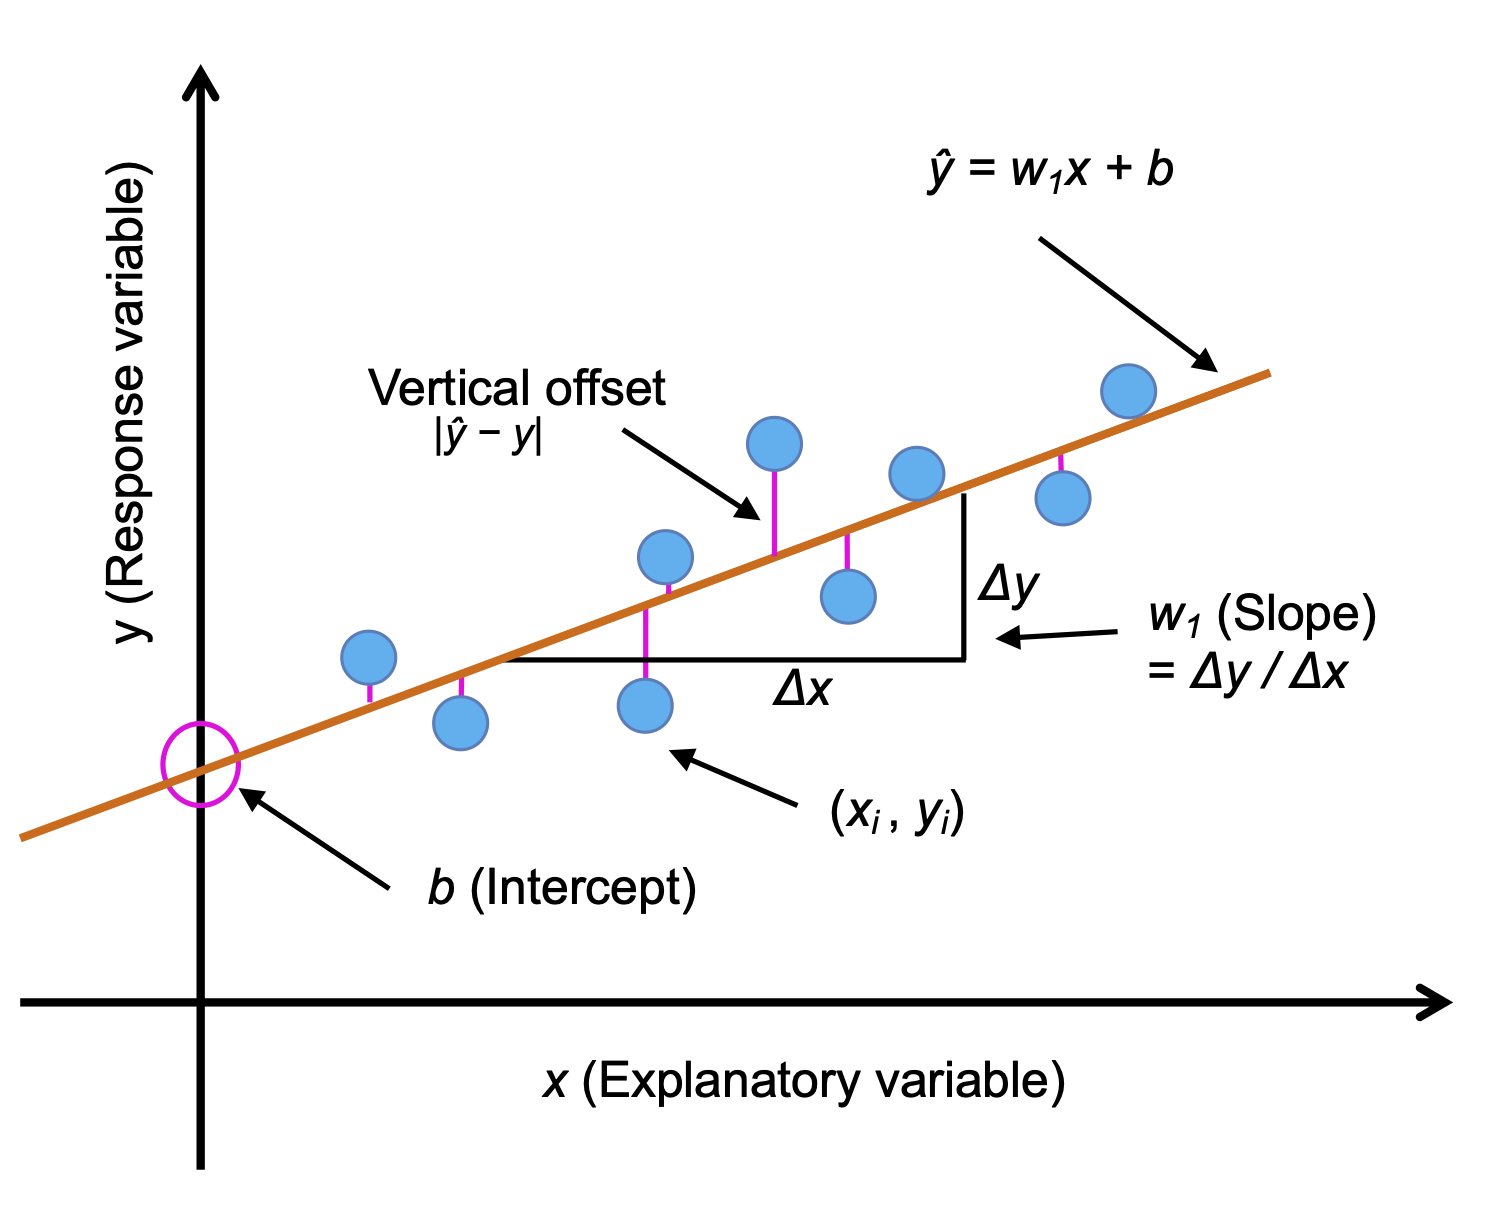

In [4]:
# * Image(...)
# Use the Image class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/09_01.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/09_01.png', which is a relative path to the current directory.
# * width=500
# Set the image width to 500 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

Image(filename='figures/09_01.png', width=500) 

## Multiple linear regression

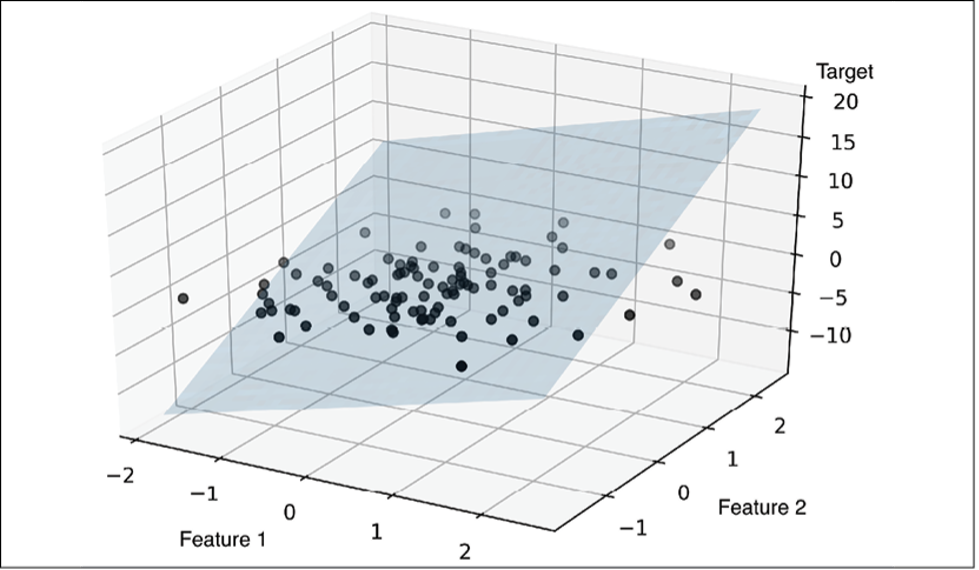

In [5]:
# * Image(...)
# Use the Image class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/09_01_2.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/09_01_2.png', which is a path relative to the current directory.
# * width=500
# Set the image width to 500 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

Image(filename='figures/09_01_2.png', width=500) 

# Exploring the Ames Housing dataset

## Loading the Ames Housing dataset into a data frame

- Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

In [6]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

# sep='\t': This argument specifies that the file is tab-separated (\t is the tab character).
# The default separator for CSV files os a comma, but since this is a tab-separated file, we explicitly define it here.

# This function reads a file into a DataFrame.
# usecols=columns: This argument tells pandas to only load the specified columns (the list you defined earlier)
# from the dataset, tather than loading every column to the file.

df.head() # This function displays the first five rows of the DataFrame df by default.

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [7]:
df.shape # Attribute in Pandas is used to get the dimensions of the DataFrame df

(2930, 6)

In [8]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

# Converts the categorical values in the 'Central Air' column of the DataFrame df into numerical values.
# df['Central Air']: This selects the 'Central Air' column from the DataFrame df.
# The map() function is used to replace the categorical values in the column with the corresponding numerical values based on:
# 'N' is replaced with 0 (indicating "No central air").
# 'Y' is replaced with 1 (indicating "Yes, central air").

In [9]:
df.isnull().sum()

# This functions checks each value in the DataFrame df to see if it is NaN (Not a Number),
# sum() sums up al the True values (the null values) in each column.
# The sum() function, when applied to a DataFrame of Boolean values, treats True as 1 and False as 0.

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [10]:
# remove rows that contain missing values

df = df.dropna(axis=0)

# dropna() is a function used to remove missiong data (NaN values) from a DataFrame.
# axis=0: Specifies that you want to drop rows with missing values.
# axis=0 means "rows". If you wanted to drop columns with missiong values, you would use axis=1.

df.isnull().sum()

# This function checks for null (missing) values again after rows with missing data have been removed.

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

## Visualizing the important characteristics of a dataset

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# mlxtend.plotting: mlxtend (short for "machine learning extensions") is a Python library that contains additional tools for data analysis.

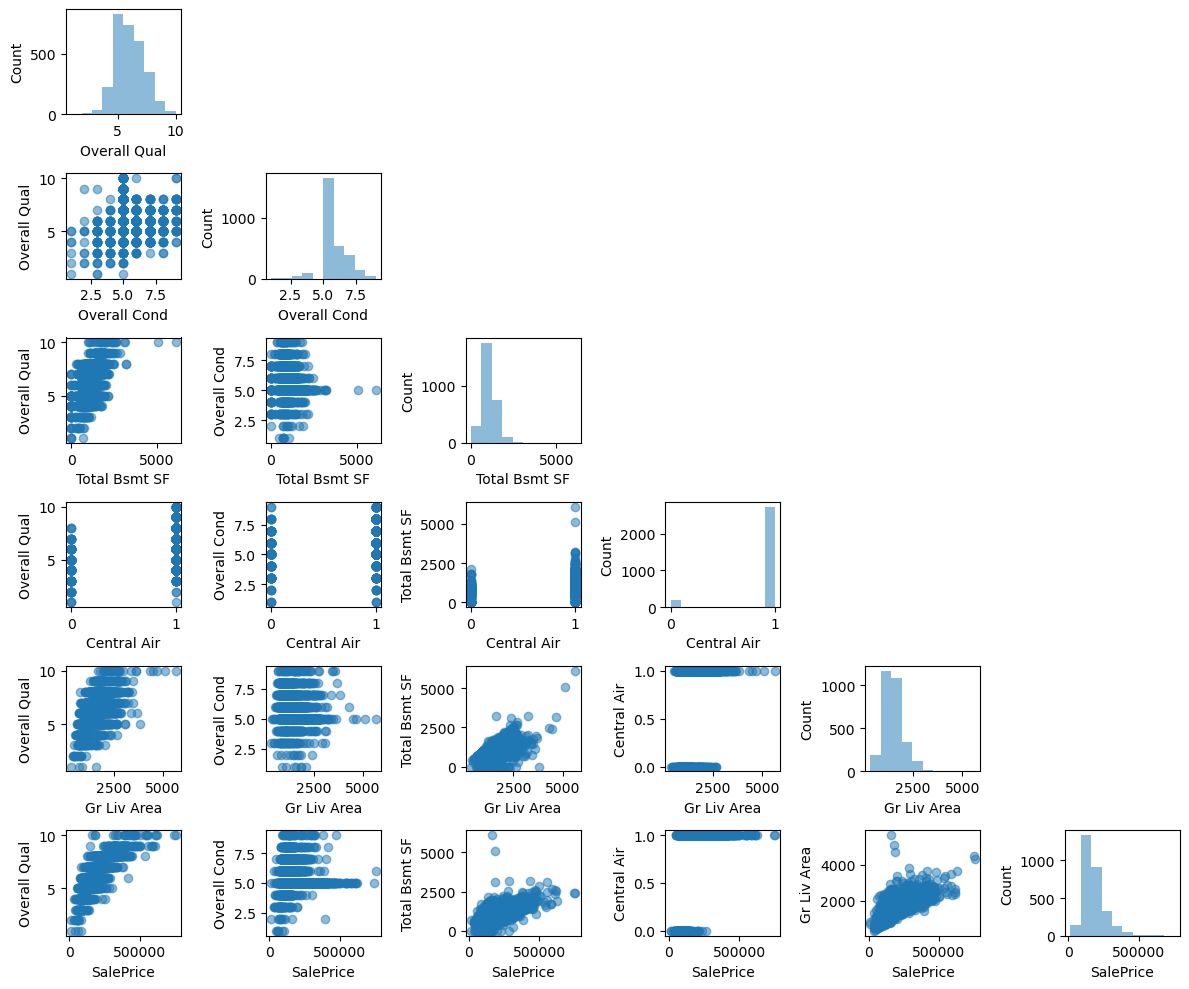

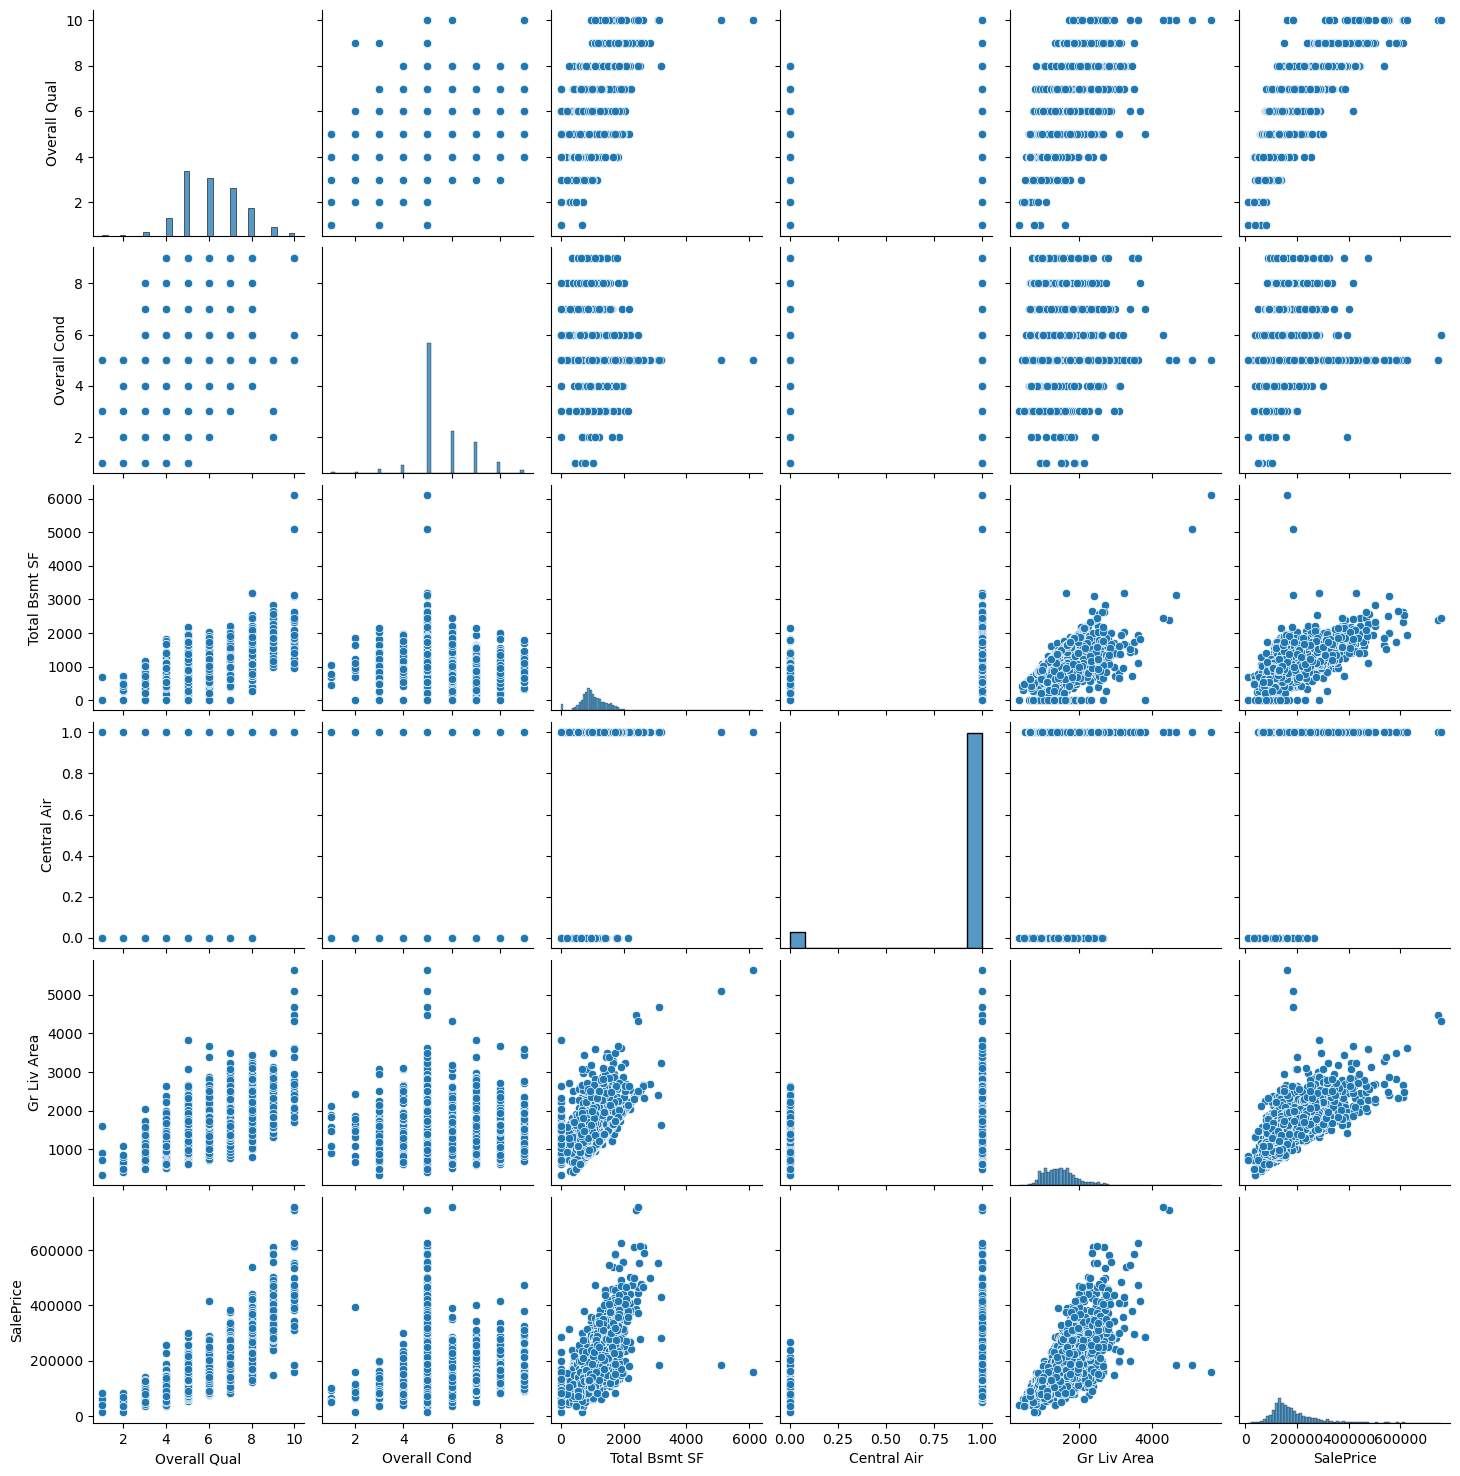

In [12]:
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)

# names: This argument provides the names (labels) for each variable in the scatterplot matrix.
# df.columns: This extracts the column names from the DataFrame df, so that each scatterplot in the matrix is labeled with the name of the
# alpha sets the transparency level of the points in the scatterplot.

plt.tight_layout()

# plt.tight_layout() is used in Matplotlib to automatically adjust the spacing between subplots in a figure.

#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

import seaborn as sb
sb.pairplot(df)
plt.show()

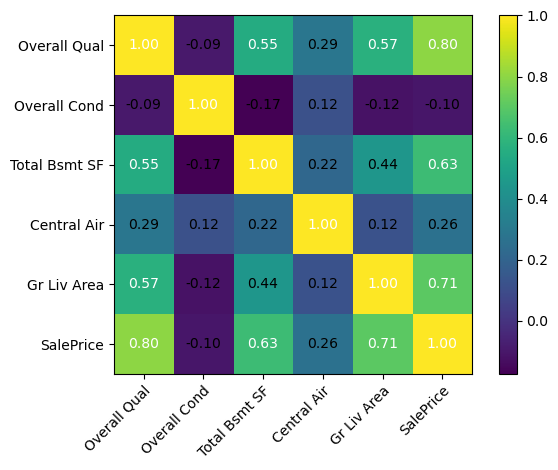

In [13]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()

# plt.tight_layout() is used in Matplotlib to automatically adjust the spacing between subplots in a figure.

#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

# Implementing an ordinary least squares linear regression model

## Solving regression for regression parameters with gradient descent

In [14]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

## <span style="color: red;"> Using only one feature </span>

In [15]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [17]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

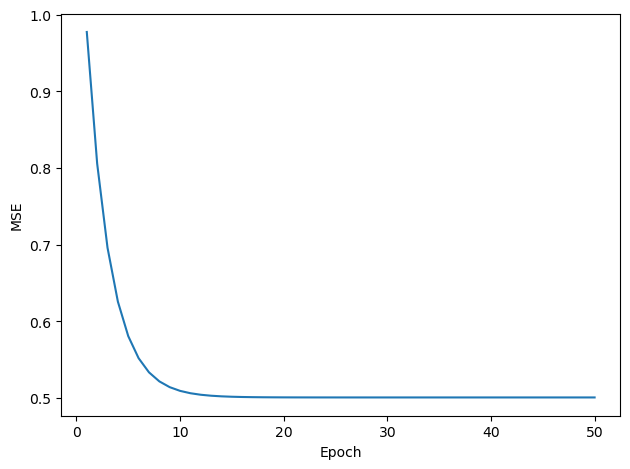

In [18]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

In [19]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

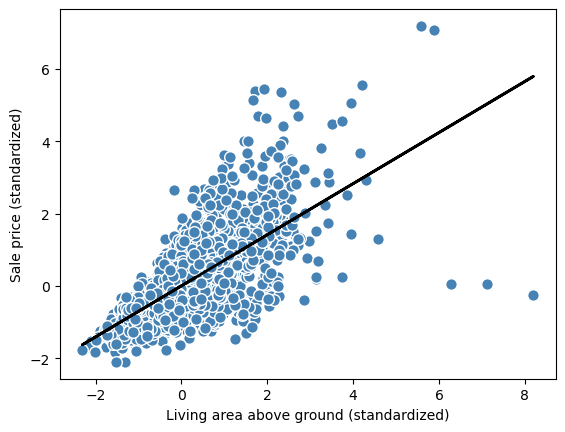

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()

In [21]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07


In [22]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


## Estimating the coefficient of a regression model via scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
slr = LinearRegression()

# LinearRegression(): This is a class provided by the sci-kit learn library (imported as sklearn),
# which implements linear regression algorithm.

slr.fit(X, y)

# fit(X, y): This method is used to train the linear regression model.
# X: The 2D NumPy array containing the feature(s) (in this case, just 'Gr Liv Area').
# y: The 1D NumPy array containing the target variable (in this case, 'SalePrice').

y_pred = slr.predict(X)

# predict(X): This method is used to make predictions based on the fitted model.

print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

index = 2 # Index of the element you want to predict for
single_feature_value = X[index] # Extract the single feature value

print(single_feature_value)

single_pred = slr.predict([single_feature_value])

print(single_pred)


Slope: 111.666
Intercept: 13342.979
[1329]
[161747.43610435]


In [25]:
# Check the result

Slope = 111.666
Intercept = 13342.979
print(Slope * 1329 + Intercept)

161747.093


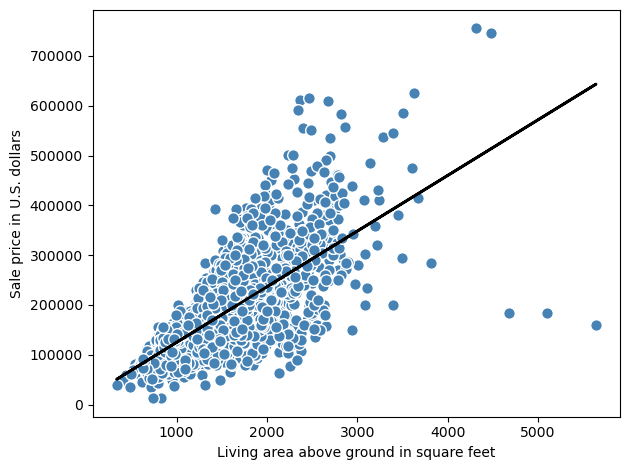

In [26]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

**Normal Equations** alternative:

In [27]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'Slope: {w[1]:.3f}')
print(f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


## <span style="color: red;"> Single prediction </span>

In [28]:
# Predict SalePrice for new features: Gr Liv Area = 850
new_data = ([[850]])
predicted_price = slr.predict(new_data)

print("Predicted SalePrice: ", predicted_price)

Predicted SalePrice:  [108259.29832051]


## <span style="color: red;"> Check the single prediction manually </span>

In [29]:
print(850 * 111.666 + 13342.979)

108259.079


# Fitting a robust regression model using RANSAC

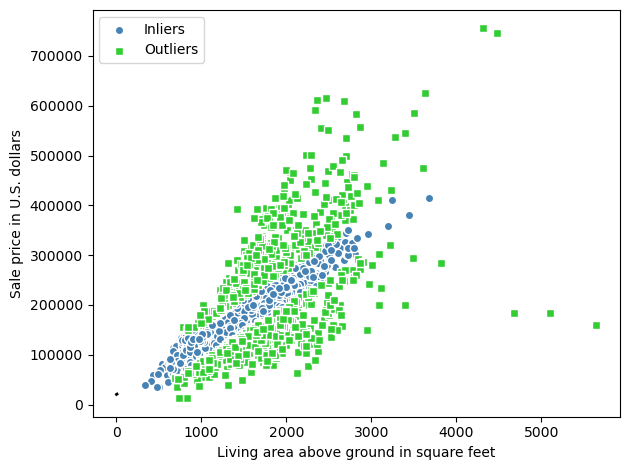

In [30]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=None, # default 
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [31]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [32]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))
    
median_absolute_deviation(y)

37000.0

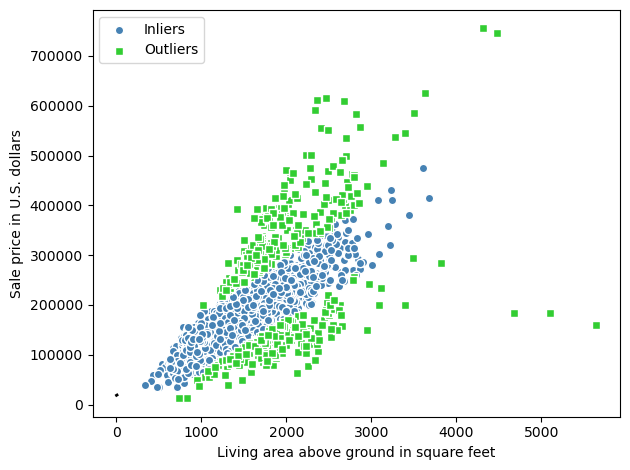

In [33]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=65000, # default 
                         random_state=123)

# max_trials=100: This parameter controls the maximum number of iterations RANSAC will try.

# min_samples: This specifies the minimum number of samples required to fit the base model (LinearRegression in this case).
# min_samples=0.95 means that at least 95% of the dataset should be used for fitting the model in each iteration. It can be specified as an inlier.

# The loss function used to evaluate how well the model fits the inlier data.
# 'absolute error' is the default loss function, also known as the L1 loss.

# residual_threshold=65000: The residual threshold defines the maximum allowed error for a data point to be classified as an inlier.
# Any data point with a residual (error) larger than 65,000 will be considered an outlier and excluded from the model fitting.

# random_state=123: A seed for the random number generator, ensuring that the randomization process in RANSAC is reproducible.

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_

# ransac.inlier_mask_ is a boolean array that indicates whether each sample in the dataset is classified
# as an inlier (True) or an outlier (False).

outlier_mask = np.logical_not(inlier_mask)

# np.logical_not(inlier_mask) is a NumPy function that negates the boolean values in inlier_mask.
# It converts True values to False and viceversa.

line_X = np.arange(3, 10, 1)

line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_10.png', dpi=300)
plt.show()

In [34]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 105.631
Intercept: 18314.587


# Evaluating the performance of linear regression models

In [35]:
from sklearn.model_selection import train_test_split


target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [36]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

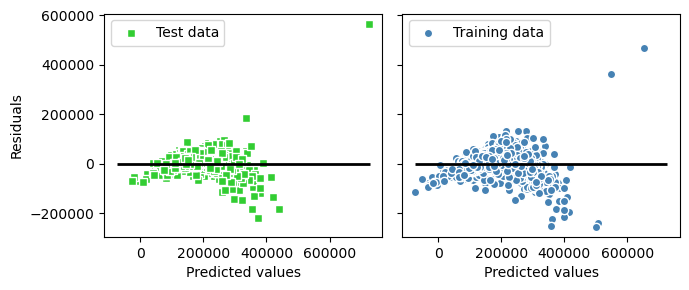

In [37]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

## <span style="color: red;"> Calculating the Mean Squared Error </span>

In [38]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


## <span style="color: red;">  Calculating the Mean Absolute Error </span>

In [39]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


## <span style="color: red;">  Calculating the Coefficient of Determination </span>

In [40]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.77
R^2 test: 0.75


# Using regularized methods for regression

In [41]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[26251.38276394   804.70816337    41.94651964 11364.80761309
    55.67855548]


In [42]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {train_mse:.3f}, test: {test_mse:.3f}')

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

MSE train: 1497216262.014, test: 1516576825.348
R^2 train: 0.769, 0.752


Ridge regression:

In [43]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)

LASSO regression:

In [44]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)

Elastic Net regression:

In [45]:
from sklearn.linear_model import ElasticNet


elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Turning a linear regression model into a curve - polynomial regression

In [46]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [47]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
# Initializes a simple linear regression model, stored in the variable lr

pr = LinearRegression()
# Initializes a simple linear regression model, stored in the variable pr

quadratic = PolynomialFeatures(degree=2)
# PolynomialFeatures is a transformer class from sklearn.preprocessing.
# It creates new features by raising the original features to higher powers
# degree=2: This specifies that you want to include features raised to the 2nd power (i.e., quadratic terms).
# You could raise it higher by changing the drgree (e.g., degree=3 for cubic features).

X_quad = quadratic.fit_transform(X)
# fit_transform(): This method is used to fit the transformer to the data and then transform the data in one step.
# X-quad. This is the transformed input data, which contains the original features plus the quadratic (degree 2) features (e.g., squares).

print(X_quad)
print(258**2)
print(270**2)
print(294**2)

[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]
66564
72900
86436


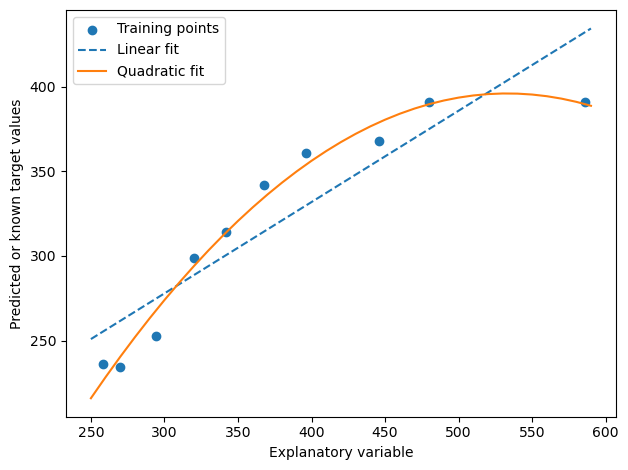

In [48]:
# fit linear features

lr.fit(X, y)
# fit(X, y): This methos trains the linear regression model using X and y

X_fit = np.arange(250, 600, 10)[:, np.newaxis]
# This creates an array of values from 250 to 590, with a step size of 10.
# [:, np.newaxis]: This reshapes the 1D array into a 2D array (with one column).
# This is necessary because scikit-learn expects the input features (X) to be 2D (rows as data points, columns as features).

y_lin_fit = lr.predict(X_fit)
# predict(X_fit): This method uses the trained linear regression model (lr) to predict target values for the input X_fit.
# y_lin_fit: This is the array of predicted target values based on the linear model.

# fit quadratic features
pr.fit(X_quad, y)

# pr.fit(X_quad, y): This methos trains another linear regression model using the transformed input data X_quad and y
# pr: This is the polynomial regression model (which is still a linear model but fitted on polynomial-transformed features).

y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
# pr.predict(quadratic.fit_transform(X_fit)): This uses the trained polynomial regression model to predict target values
# based on the transformed input values.
# y_quad_fit: This is the array of predicted target values based on the polynomial model.

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

In [49]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [50]:
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Ames Housing dataset

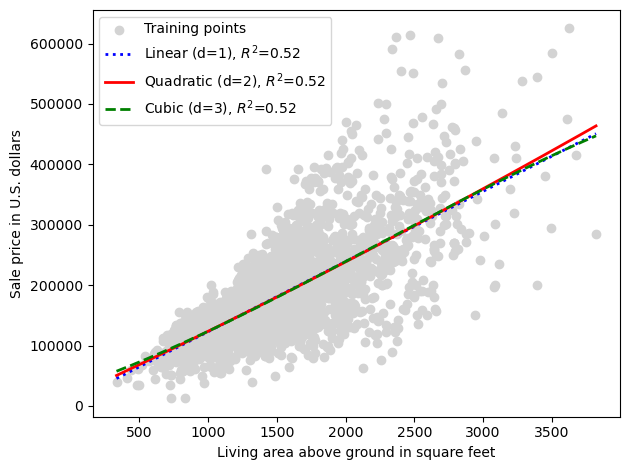

In [51]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
# np.arrange(start, stop, step): This function from the NumPy library creates an array of evenly spaced values within a specified range.
# [:, np.newaxis]: Reshapes this range into a 2D array (required for prediction).

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/09_13.png', dpi=300)
plt.show()

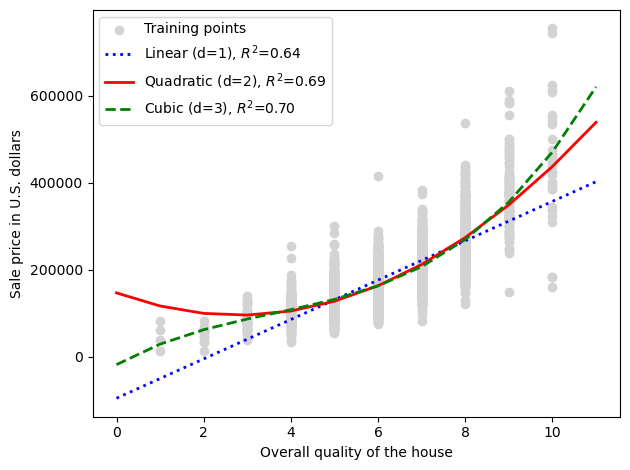

In [52]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_14.png', dpi=300)
plt.show()

# Dealing with nonlinear relationships using random forests

## Decision tree regression

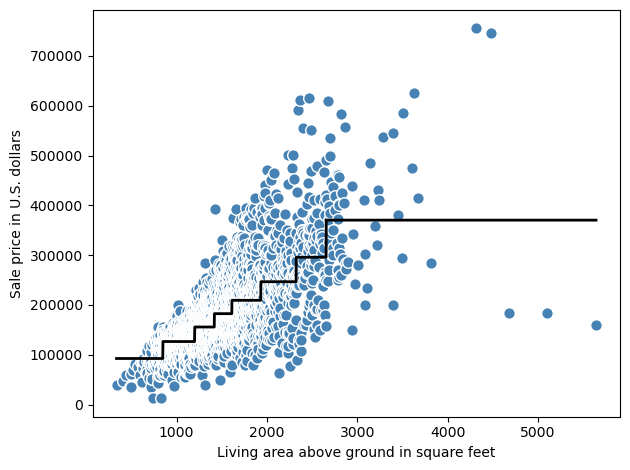

In [53]:
from sklearn.tree import DecisionTreeRegressor


X = df[['Gr Liv Area']].values
y = df['SalePrice'].values



tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_15.png', dpi=300)
plt.show()

In [54]:
tree_r2 = r2_score(y, tree.predict(X))
tree_r2

0.5144569334885711

## Random forest regression

In [55]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [56]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


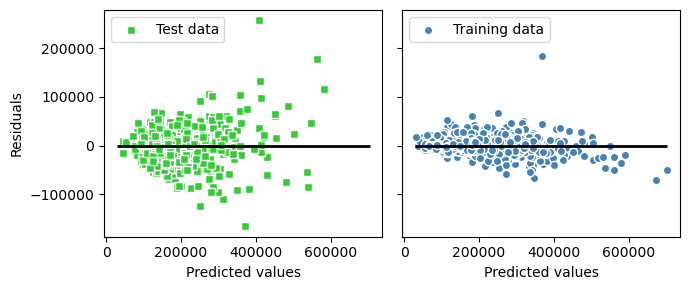

In [57]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()

## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: linear </span>

In [58]:
X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values
# X is a 2D array with multiple features (Overall Qual, Total Bsmt SF, and GR Liv Area), which are the input variables.
# y is a 1D array containing the dependent variable (output), which is the sale price of each house.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
# LinearRegression(): This initializes a linear regression model from sci-kit learn. The variable slr now holds this model.

slr.fit(X_train, y_train)
# fit(X, y): This method trains (or "fits") the linear regression model using the data.

LinearRegression()

In [59]:
# Print the coefficient of determination
y_pred = slr.predict(X_test)
# slr: Is the linear regression model we trained earlier using slr.fit(X, y).
# predict(X): Is the method used to predict the target values (y_pred) based on the input features (X).

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 25164.807340156796
Mean Squared Error (MSE): 1528876276.2351944
R-squared: 0.7495582730481782


In [60]:
coefficients = slr.coef_        # Coefficients from the trained model
intercept = slr.intercept_      # Intercept from the trained model

# Print the coefficients
print("Coefficients:", coefficients)

# If you also want to print the intercept
print("Intercept:", intercept)

Coefficients: [26840.44658479    42.4627785     55.12410704]
Intercept: -110042.37798983423


## <span style="color: red;"> Make a single prediction </span>

In [61]:
# Predict SalePrice for new features: Overall Qual = 7, Total Bsmt SF = 1000, Gr Liv Area = 1500
new_data = [[7, 1000, 1500]]
predicted_price = slr.predict(new_data)

print("Predicted SalePrice:", predicted_price)

Predicted SalePrice: [202989.68716394]


## <span style="color: red;"> Check the result manually </span>

In [62]:
new_data = np.array([7, 1000, 1500])        # Example data: Overall Qual = 7, Total Bsmt SF = 1000, Gr Liv Area = 1500

# Manually calculate the prediction
coefficients = slr.coef_                    # Coefficients from the train model
intercept = slr.intercept_                  # Intercept from the trained model

# Multiply the coefficients by the new data and add the intercept
manual_prediction = np.dot(coefficients, new_data) + intercept

print("Manual Prediction:", manual_prediction)

Manual Prediction: 202989.68716393597


## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: quadratic </span>

In [63]:
# X = df[['Overall Qual']].values
# y = df['SalePrice'].values

X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values
# X is a 2D array with multiple features (Overall Qual, Total Bsmt SF, and Gr Liv Area), which are the input variables.
# y is a 1D array containing the dependent variable (output), which is the sale price of each house.

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train)

regr_quadratic = regr.fit(X_train_quadratic, y_train)

# Print the coefficients and intercept for the quadratic model
print("Quadratic Model Coefficients:", regr_quadratic.coef_)
print("Quadratic Model Intercept:", regr_quadratic.intercept_)

# New data for which we want to predict: Overall Qual = 7, Total Bsmt SF = 1000, Gr Liv Area = 1500
new_data_quadratic = np.array([[7, 1000, 1500]])

# Step 1: Transform the new data using the quadratic features
transformed_new_data_quadratic = quadratic.transform(new_data_quadratic)

print("Quadratic Trasformed Data:", transformed_new_data_quadratic[0])

# Step 2: Use the trained model to predict the SalePrice for the new data
predicted_price = regr_quadratic.predict(transformed_new_data_quadratic)

print("Predicted SalePrice:", predicted_price)

Quadratic Model Coefficients: [ 0.00000000e+00 -1.99624022e+04  2.21069859e+00 -5.46845291e+00
 -1.01995291e+03  2.36201412e+01  2.11184487e+01 -1.31033497e-02
 -4.73554949e-02 -5.58142619e-03]
Quadratic Model Intercept: 97436.9659377787
Quadratic Trasformed Data: [1.00e+00 7.00e+00 1.00e+03 1.50e+03 4.90e+01 7.00e+03 1.05e+04 1.00e+06
 1.50e+06 2.25e+06]
Predicted SalePrice: [192120.37579838]


In [64]:
# Assuming these are the coefficients from the trained model
coefficients = regr_quadratic.coef_
intercept = regr_quadratic.intercept_

# Example input (after transformation to quadratic terms)
transformed_new_data = np.array(
    [1,             # Intercept Term
    7,              # X1 (Overall Qual)
    1000,           # X2 (Total Bsmt SF)
    1500,           # X3 (Gr Liv Area)
    49,             # X1 ^ 2
    7000,           # X1 * X2
    10500,          # X1 * X3
    1000000,        # X2 ^ 2
    1500000,        # X2 * X3
    2250000])       # X3 ^ 2

# 1 is the intercept term.
# 7, 1000, 1500 are the original features.
# 49 = 7 ^ 2, 7000 = 7 * 1000, 10500 = 7 * 1500.
# 1000000 = 1000 ^ 2, 1500000 = 1000 * 1500.
# 2250000 = 1500 ^ 2.

# Manually calculate the predicition by performing the dot product between the coefficients and the transformed features
manual_prediction = np.dot(coefficients, transformed_new_data) + intercept

print("Manually Calculated SalePrice:", manual_prediction)

Manually Calculated SalePrice: 192120.3757983826


In [65]:
X_test_quadratic = quadratic.fit_transform(X_test)

y_pred_quadratic = regr.predict(X_test_quadratic)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_quadratic)
mse = mean_squared_error(y_test, y_pred_quadratic)
R2 = r2_score(y_test, y_pred_quadratic)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 21342.445164934077
Mean Squared Error (MSE): 869166647.621604
R-squared: 0.857623798849637


## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: cubic </span>

In [66]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

regr = LinearRegression()

# create cubic features
cubic = PolynomialFeatures(degree=3)
X_train_cubic = cubic.fit_transform(X_train)

regr_cubic = regr.fit(X_train_cubic, y_train)

# Print the coefficients and intercept for the cubic model
print("Cubic Model Coefficients:", regr_cubic.coef_)
print("Cubic Model Intercept:", regr_cubic.intercept_)

# New data for which we want to predict: Overall Qual = 7, Total Bsmt SF = 1000, Gr Liv Area = 1500
new_data_cubic = np.array([[7, 1000, 1500]])

# Step 1: Transform the new data using using the cubic features
transformed_new_data_cubic = cubic.transform(new_data_cubic)

print("Cubic Transformed Data:", transformed_new_data_cubic[0])

# Step 2: Use the train model to predict the SalePrice for the new data
predicted_price_cubic = regr_cubic.predict(transformed_new_data_cubic)

print("Predicted SalePrice:", predicted_price_cubic)

Cubic Model Coefficients: [ 0.00000000e+00  3.50914384e+04  5.49617110e+01 -7.22540137e+01
 -7.20128295e+02 -3.92510007e+01 -4.28542308e+00  2.18112047e-02
  5.00786682e-02  3.89038313e-02 -5.26648877e+02  4.77332068e+00
  3.03727217e+00 -2.17791775e-03 -4.97901137e-05 -4.57181756e-03
 -1.82084023e-06 -1.40674820e-06 -1.57729337e-05  7.80870323e-07]
Cubic Model Intercept: 14819.285897819704
Cubic Transformed Data: [1.000e+00 7.000e+00 1.000e+03 1.500e+03 4.900e+01 7.000e+03 1.050e+04
 1.000e+06 1.500e+06 2.250e+06 3.430e+02 4.900e+04 7.350e+04 7.000e+06
 1.050e+07 1.575e+07 1.000e+09 1.500e+09 2.250e+09 3.375e+09]
Predicted SalePrice: [188395.31924019]


In [67]:
# Assuming these are the coefficients from the trained model
coefficients_cubic = regr_cubic.coef_
intercept_cubic = regr_cubic.intercept_

# Example input (after transformation to cubic terms)
transformed_new_data_cubic = np.array(
    [1,             # Intercept Term
    7,              # X1 (Overall Qual)
    1000,           # X2 (Total Bsmt SF)
    1500,           # X3 (Gr Liv Area)
    49,             # X1 ^ 2
    7000,           # X1 * X2
    10500,          # X1 * X3
    1000000,        # X2 ^ 2
    1500000,        # X2 * X3
    2250000,        # X3 ^ 2
    343,            # X2 ^ 3
    49000,          # X1 ^ 2 * X2
    73500,          # X1 ^ 2 * X3
    7000000,        # X2 ^ 2 * X1
    10500000,       # X1 * X2 * X3
    15750000,       # X3 ^ 2 * X1
    1000000000,     # X2 ^ 3
    1500000000,     # X2 ^ 2 * X3
    2250000000,     # X3 ^ 2 * X2
    3375000000])    # X3 ^ 3

# Manually calculate the prediction by performing the dot product between the coefficients and the transformed features
manual_prediction_cubic = np.dot(coefficients_cubic, transformed_new_data_cubic) + intercept_cubic

print("Manually Calculated SalePrice:", manual_prediction_cubic)

Manually Calculated SalePrice: 188395.31924019454


In [68]:
X_test_cubic = cubic.fit_transform(X_test)

y_pred_cubic = regr_cubic.predict(X_test_cubic)

# print(y_pred_cubic)

In [69]:
# Calculate evaluation metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred_cubic)
mse = mean_squared_error(y_test, y_pred_cubic)
R2 = r2_score(y_test, y_pred_cubic)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 21650.001459050316
Mean Squared Error (MSE): 1297457827.4310992
R-squared: 0.7874663999959821


## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: decision tree regression </span>

In [70]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

tree = DecisionTreeRegressor(max_depth=3)   # The parameter specifies the maximum depth of the decision tree.
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
y_pred_random_tree = tree.predict(X_test)

# print(y_pred_random_tree)

In [72]:
# Calculate evaluation metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred_random_tree)
mse = mean_squared_error(y_test, y_pred_random_tree)
R2 = r2_score(y_test, y_pred_random_tree)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 29020.66530314816
Mean Squared Error (MSE): 1623969277.9248815
R-squared: 0.7339813058766803


## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: random forests regression </span>

In [73]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values

x_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

forest = RandomForestRegressor(n_estimators=1000,           # Number of decision trees in the random forest.
                               criterion='squared_error',   # Function (MSE) used to measure the quality of a split 
                               random_state=1,              # within each decision tree.
                               n_jobs=-1)                   # This allows the random forest to use all available
forest.fit(X_train, y_train)                                # CPU cores for parallel processing.

y_pred_random_forest = forest.predict(X_test)

In [74]:
# Calculate evaluation metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred_random_forest)
mse = mean_squared_error(y_test, y_pred_random_forest)
R2 = r2_score(y_test, y_pred_random_forest)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 22286.96227343887
Mean Squared Error (MSE): 1045233786.4877558
R-squared: 0.8287826434190049


# Summary

---

Readers may ignore the next cell.

In [75]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ch09.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ch09.ipynb.
# * --output ch09.py
# This option tells the script to save the output (the converted file) with the name
# ch09.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ch09.ipynb --output ch09.py

[NbConvertApp] Converting notebook ch09.ipynb to script
[NbConvertApp] Writing 43335 bytes to ch09.py
